<a href="https://colab.research.google.com/github/21501A0549/ML_LAB_549/blob/main/week_8_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('knn - Sheet1.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:,[1,3]].values
y= data_set.iloc[:, 4].values

# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
x

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1, 1.5],
       [2.3, 1.3],
       [2.8, 1.5],
       [2.8, 1.3],
       [3.3, 1.6],
       [2.4, 1. ],
       [2.9, 1.3],
       [2.7, 1.4],
       [3.3, 2.5],
       [2.7, 1.9],
       [3. , 2.1],
       [2.9, 1.8],
       [3. , 2.2],
       [3. , 2.1],
       [2.5, 1.7],
       [2.9, 1.8],
       [2.5, 1.8]])

In [ ]:
y


array(['Class_A', 'Class_B', 'Class_C', 'Class_A', 'Class_C', 'Class_B',
       'Class_C', 'Class_A', 'Class_B', 'Class_B', 'Class_A', 'Class_B',
       'Class_C', 'Class_C', 'Class_A', 'Class_B', 'Class_C', 'Class_A',
       'Class_B', 'Class_C', 'Class_C', 'Class_A', 'Class_B', 'Class_C',
       'Class_A', 'Class_B', 'Class_C', 'Class_A', 'Class_B'],
      dtype=object)

In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [ ]:
y_pred

array(['Class_A', 'Class_A', 'Class_A', 'Class_A', 'Class_B', 'Class_A',
       'Class_A', 'Class_A'], dtype=object)

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

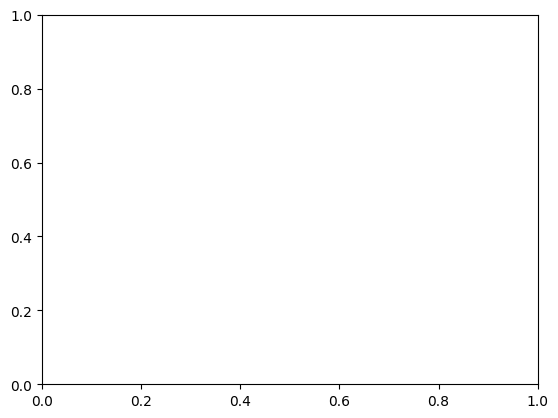

In [ ]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red','green' )))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K-NN Algorithm (Training set)')
mtp.xlabel('column1')
mtp.ylabel('column2')
mtp.legend()
mtp.show()